# [Kaggle] Digit Recognizer 

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

> https://www.kaggle.com/c/digit-recognizer

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import math

In [100]:
print(tf.__version__)

2.2.0-rc3


## Model

### Implemented a modified LeNet-5. 

**LeNet-5** - GradientBased Learning Applied to Document Recognition (Yann LeCun Leon Bottou Yoshua Bengio and Patrick Haffner) (http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf)

### [LeNet-5] Original Architecture

ConvNet --> Pool --> ConvNet --> Pool --> (Flatten) --> FullyConnected --> FullyConnected --> Softmax 

### Results

**epochs** - 30  
**loss** - 0.0016  
**train_accuracy** -  0.9998  
**val_loss** -  0.0412  
**val_accuracy** - 0.9905  

#### Highest Dev Set Accuracy Obtained - 99.05%

In [0]:
def LeNet5(input_shape = (32, 32, 1), classes = 10):
    """
    Implementation of a modified LeNet-5.
    Modified Architecture -- ConvNet --> Pool --> ConvNet --> Pool --> (Flatten) --> FullyConnected --> FullyConnected --> Softmax 

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    model = Sequential([
        
    # Layer 1
    Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,1), name = 'convolution_1'),
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_1'),
        
    # Layer 2
    Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu', name = 'convolution_2'),
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_2'),
        
    # Layer 3
    Flatten(name = 'flatten'),
    Dense(units = 120, activation = 'relu', name = 'fully_connected_1'),
        
    # Layer 4
    Dense(units = 84, activation = 'relu', name = 'fully_connected_2'),
    
    # Output
    Dense(units = 10, activation = 'softmax', name = 'output')
        
    ])
    
    model._name = 'LeNet5'

    return model

### [LeNet-5] Modified Architecture

ConvNet --> **ConvNet** --> Pool --> **(Dropout)** --> ConvNet --> Pool --> **(Dropout)** --> (Flatten) --> FullyConnected --> FullyConnected --> Softmax 

### Results

**epochs** - 30  
**loss** - 0.0319  
**train_accuracy** -  0.9918  
**val_loss** -  0.0327  
**val_accuracy** - 0.9929  

#### Highest Dev Set Accuracy Obtained - 99.29%

In [0]:
def LeNet5v1(input_shape = (32, 32, 1), classes = 10):
    """
    Implementation of a modified LeNet-5.
    Modified Architecture -- ConvNet --> ConvNet --> Pool --> (Dropout) --> ConvNet --> Pool --> (Dropout) --> (Flatten) --> FullyConnected --> FullyConnected --> Softmax 

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    model = Sequential([
        
    # Layer 1
    Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,1), name = 'convolution_1'),
    
    # Layer 2    
    Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', name = 'convolution_2'),
    
    # -------------------------------- # 
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_1'),
    Dropout(0.25, name = 'dropout_1'),
    # -------------------------------- # 
        
    # Layer 3
    Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu', kernel_regularizer = l2(0.01), name = 'convolution_3'),
    
    # -------------------------------- # 
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_2'),
    Dropout(0.25, name = 'dropout_2'),
    Flatten(name = 'flatten'),
    # -------------------------------- # 
        
    # Layer 4
    Dense(units = 120, activation = 'relu', name = 'fully_connected_1'),
        
    # Layer 5
    Dense(units = 84, activation = 'relu', name = 'fully_connected_2'),
    
    # Output
    Dense(units = 10, activation = 'softmax', name = 'output')
        
    ])
    
    model._name = 'LeNet5v1'

    return model

### [LeNet-5] Modified Architecture

ConvNet --> **ConvNet** --> **BatchNorm** --> Pool --> **(Dropout)** --> ConvNet --> **ConvNet** --> **BatchNorm** --> Pool --> **(Dropout)** --> (Flatten) --> **FullyConnected** --> **BatchNorm** --> FullyConnected --> **BatchNorm** --> FullyConnected --> **BatchNorm** --> **(Dropout)** --> Softmax 

### Results

**epochs** - 30  
**loss** - 0.0112  
**train_accuracy** - 0.9982   
**val_loss** -  0.0192  
**val_accuracy** - 0.9962  

#### Highest Dev Set Accuracy Obtained - 99.62%

In [0]:
def LeNet5v2(input_shape = (32, 32, 1), classes = 10):
    """
    Implementation of a modified LeNet-5.
    Only those layers with learnable parameters are counted in the layer numbering.
    
    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    model = Sequential([
        
    # Layer 1
    Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,1), kernel_regularizer=l2(0.0005), name = 'convolution_1'),
    
    # Layer 2
    Conv2D(filters = 32, kernel_size = 5, strides = 1, name = 'convolution_2', use_bias=False),
    
    # Layer 3    
    BatchNormalization(name = 'batchnorm_1'),
        
    # -------------------------------- #  
    Activation("relu"),
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_1'),
    Dropout(0.25, name = 'dropout_1'),
    # -------------------------------- #  
        
    # Layer 3
    Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', kernel_regularizer=l2(0.0005), name = 'convolution_3'),
        
    # Layer 4
    Conv2D(filters = 64, kernel_size = 3, strides = 1, name = 'convolution_4', use_bias=False),
        
    # Layer 5
    BatchNormalization(name = 'batchnorm_2'),
        
    # -------------------------------- #  
    Activation("relu"),
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_2'),
    Dropout(0.25, name = 'dropout_2'),
    Flatten(name = 'flatten'),
    # -------------------------------- #  
        
    # Layer 6
    Dense(units = 256, name = 'fully_connected_1', use_bias=False),
        
    # Layer 7
    BatchNormalization(name = 'batchnorm_3'),
    
    # -------------------------------- #  
    Activation("relu"),
    # -------------------------------- #  
        
    # Layer 8
    Dense(units = 128, name = 'fully_connected_2', use_bias=False),
        
    # Layer 9
    BatchNormalization(name = 'batchnorm_4'),
        
    # -------------------------------- #  
    Activation("relu"),
    # -------------------------------- #  
        
    # Layer 10
    Dense(units = 84, name = 'fully_connected_3', use_bias=False),
        
    # Layer 11
    BatchNormalization(name = 'batchnorm_5'),
        
    # -------------------------------- #  
    Activation("relu"),
    Dropout(0.25, name = 'dropout_3'),
    # -------------------------------- #  

    # Output
    Dense(units = 10, activation = 'softmax', name = 'output')
        
    ])
    
    model._name = 'LeNet5v2'

    return model

In [0]:
LeNet5Model = LeNet5v2(input_shape = (32, 32, 1), classes = 10)

In [0]:
LeNet5Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [106]:
LeNet5Model.summary()

Model: "LeNet5v2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution_1 (Conv2D)       (None, 28, 28, 32)        832       
_________________________________________________________________
convolution_2 (Conv2D)       (None, 24, 24, 32)        25600     
_________________________________________________________________
batchnorm_1 (BatchNormalizat (None, 24, 24, 32)        128       
_________________________________________________________________
activation_40 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
convolution_3 (Conv2D)       (None, 10, 10, 64)        184

## Kaggle Data Processing

Size of Dataset:  42000
Size of Cross Validation Set:  2100


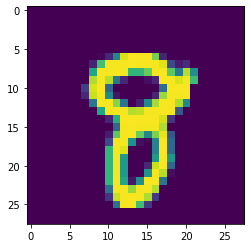

In [107]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Y = train[['label']]
X = train.drop(train.columns[[0]], axis=1)

X = X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

print("Size of Dataset: " , len(X))

cross_validation_size = int(len(X)*0.05)

print("Size of Cross Validation Set: " , cross_validation_size)

random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = cross_validation_size, random_state=random_seed)

X_test = test

plt.imshow(X_train[0][:,:,0])

In [0]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

# Padding the images by 2 pixels since in the paper input images were 32x32
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_val = np.pad(X_val, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

# Standardization
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
X_train = (X_train - mean_px)/(std_px)

mean_px = X_val.mean().astype(np.float32)
std_px = X_val.std().astype(np.float32)
X_val = (X_val - mean_px)/(std_px)

mean_px = X_test.mean().astype(np.float32)
std_px = X_test.std().astype(np.float32)
X_test = (X_test - mean_px)/(std_px)

# One-hot encoding the labels
Y_train = to_categorical(Y_train, num_classes = 10)
Y_val = to_categorical(Y_val, num_classes = 10)

In [0]:
# By using the image generator, we are not generating new data. We are only replacing the exisiting images. 

datagen = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization = False,  # divide each input by its std
        zca_whitening = False,  # apply ZCA whitening
        rotation_range = 10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip = False)  # randomly flip images

datagen.fit(X_train)

### Variable Learning Rate 

In [0]:
variable_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 2)

### Model Training

In [111]:
history = LeNet5Model.fit(X_train, Y_train, epochs = 30, batch_size = 64, callbacks = [variable_learning_rate], validation_data = (X_val,Y_val))

624/624 [==============================] - 4s 6ms/step - loss: 0.0658 - accuracy: 0.9851 - val_loss: 0.0573 - val_accuracy: 0.9886 - lr: 0.0010
Epoch 5/30
624/624 [==============================] - 4s 6ms/step - loss: 0.0548 - accuracy: 0.9877 - val_loss: 0.0498 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 6/30
624/624 [==============================] - 4s 6ms/step - loss: 0.0515 - accuracy: 0.9877 - val_loss: 0.0418 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 7/30
624/624 [==============================] - 4s 6ms/step - loss: 0.0474 - accuracy: 0.9884 - val_loss: 0.0334 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 8/30
624/624 [==============================] - 4s 6ms/step - loss: 0.0452 - accuracy: 0.9895 - val_loss: 0.0378 - val_accuracy: 0.9914 - lr: 0.0010
Epoch 9/30
624/624 [==============================] - 4s 6ms/step - loss: 0.0405 - accuracy: 0.9903 - val_loss: 0.0310 - val_accuracy: 0.9948 - lr: 0.0010
Epoch 10/30
624/624 [==============================] - 4s 6ms/step - loss: 0.0389

<Figure size 432x288 with 0 Axes>

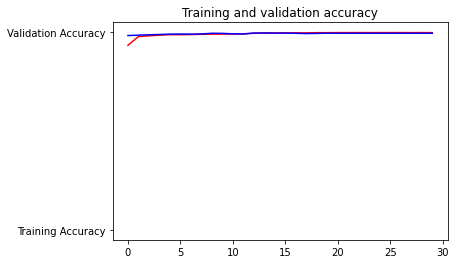

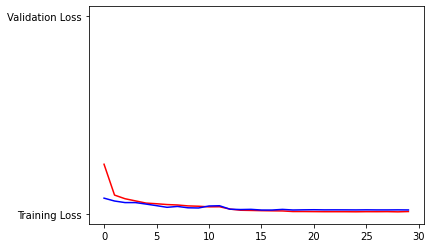

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

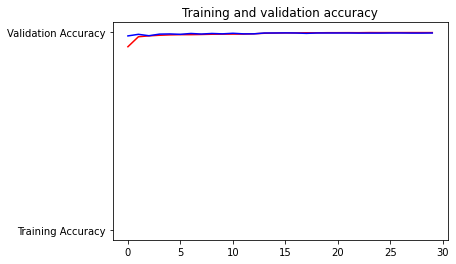

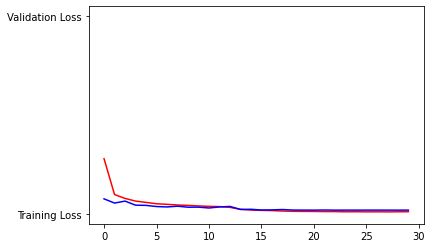

<Figure size 432x288 with 0 Axes>

In [112]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

### Submission

In [0]:
results = LeNet5Model.predict(X_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [0]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("LeNetv2.csv",index=False)

### References

* **Yassine Ghouzam**, PhD - Parameters for Data Augmentation using Image Data Generator, Variable Learning Rate using ReduceLROnPlateau (https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6)

* **Taavish Thaman** - LeNet-5 Keras (https://github.com/TaavishThaman/LeNet-5-with-Keras)